# РК-2

Коновалов Илья Николаевич, ИУ5-65Б, Вариант 7

## Задание

- Дан набор данных: https://www.kaggle.com/mohansacharya/graduate-admissions
- Для этого набора данных необходимо построить модель классификации (регрессии).
- Необходимо использовать метод опорных векторов и градиентный бустинг.
- Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик).
- Какие метрики качества Вы использовали и почему?
- Какие выводы Вы можете сделать о качестве построенных моделей?
- Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

## Импорт зависимостей

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Первичный анализ данных

In [86]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [87]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [88]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [89]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Корреляционная матрица

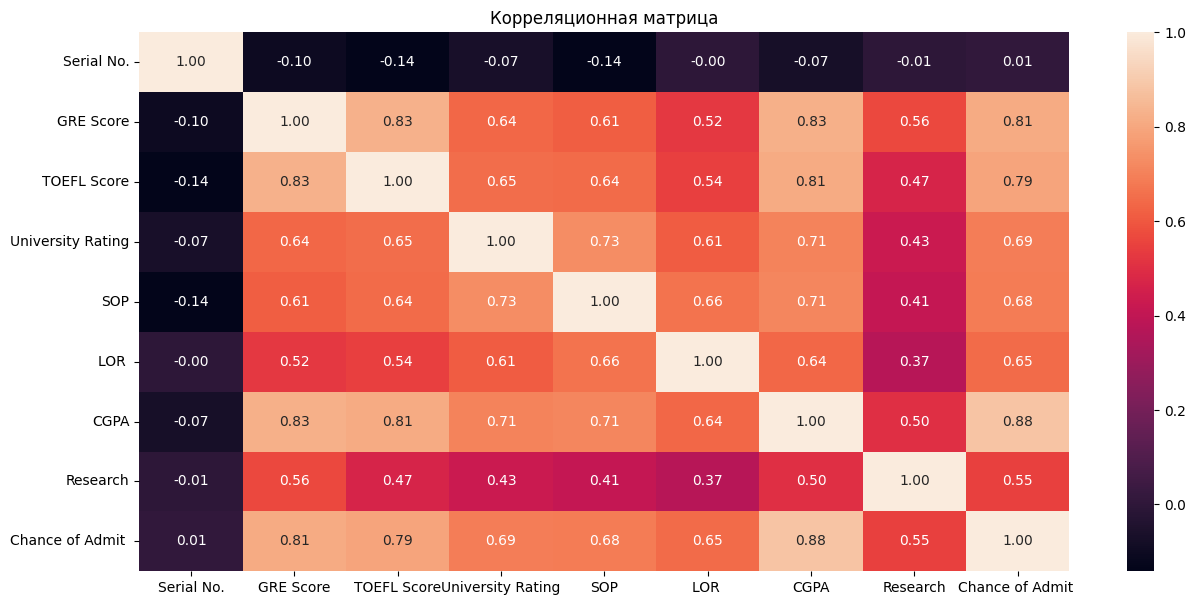

In [90]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
ax.set_title('Корреляционная матрица')
plt.show()

**Вывод**: Будем решать задачу регрессии для признака `Chance of admit` (предсказание шанса на прием в университет)

## Обработка пропусков

In [91]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

В исходном датасете пропусков нет.

### Кодирование признаков

In [92]:
label_encoder = LabelEncoder()

for col_name in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']:
    df[col_name] = label_encoder.fit_transform(df[col_name])

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,45,26,3,7,7,170,1,0.92
1,2,32,15,3,6,7,112,1,0.76
2,3,24,12,2,4,5,41,1,0.72
3,4,30,18,2,5,3,94,1,0.80
4,5,22,11,1,2,4,58,0,0.65


### Масштабирование признаков

In [93]:
df_scaler = MinMaxScaler()

df_columns = df.columns.to_list()
df_columns.remove('Chance of Admit ')

for col_name in df_columns:
    df[[col_name]] = df_scaler.fit_transform(df[[col_name]])

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.000000,0.937500,0.928571,0.75,0.875,0.875,0.928962,1.0,0.92
1,0.002004,0.666667,0.535714,0.75,0.750,0.875,0.612022,1.0,0.76
2,0.004008,0.500000,0.428571,0.50,0.500,0.625,0.224044,1.0,0.72
3,0.006012,0.625000,0.642857,0.50,0.625,0.375,0.513661,1.0,0.80
4,0.008016,0.458333,0.392857,0.25,0.250,0.500,0.316940,0.0,0.65


Выбор метрик

**Mean absolute error** - средняя абсолютная ошибка
$$MAE(y,\hat{y})=\frac{1}{N}\Sigma^{N}_{i=1}|y_i−\hat{y_i}|$$
где:

$$y\text{ - истинное значение целевого признака} $$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции mean_absolute_error.

**Mean squared error** - средняя квадратичная ошибка
$$MSE(y,\hat{y})=\frac{1}{N}\Sigma^{N}_{i=1}(y_i−\hat{y_i})2$$
где:

$$y \text{- истинное значение целевого признака}$$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$
 
Вычисляется с помощью функции mean_squared_error.


**Метрика R2** или коэффициент детерминации
$$R^2(y,\hat{y} )=1− \frac{\Sigma^{N}_{i=1} (y_i - \hat{y_i^2})}{\Sigma^{N}_{i=1} (y_i - \overline{y_i^2})}$$
где:

$$y \text{ - истинное значение целевого признака}$$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$
$$\overline{y_i}=\frac{1}{N} \cdot \Sigma^{N}_{i=1}y_i$$
Вычисляется с помощью функции r2_score.

Метрика R2 показывает относительное отклонение предсказанных значений от реальных, в то время как MAE и MSE показывают ошибку в единицах измерения целевого признака.
Так как метрика R2 в одиночку достаточно неточная, MAE и MSE гармонично её дополняют и в совокупности дают полную картину о точности модели. 

## Разбиение датасета на обучающую и тестовую выборки

In [94]:
x_df = df.drop(columns='Chance of Admit ')
y_df = df['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=73)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(375, 8) (375,)
(125, 8) (125,)


## Обучение моделей

In [95]:
svr  = SVR()
gbr = GradientBoostingRegressor()

In [96]:
svr.fit(x_train, y_train)

SVR()

In [97]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

## Получение предсказаний от моделей

In [98]:
svr_predict = svr.predict(x_test)
gbr_predict = gbr.predict(x_test)

## Оценка качества моделей

In [99]:
print('Показатели модели опорных векторов:')
print('MAE: {}, MSE: {}, R^2: {}'.format(mean_absolute_error(y_test, svr_predict), mean_squared_error(y_test, svr_predict), r2_score(y_test, svr_predict)))

Показатели модели опорных векторов:
MAE: 0.05354115389488454, MSE: 0.004879642732868312, R^2: 0.7389351138597857


In [100]:
print('Показатели модели градиентного бустинга:')
print('MAE: {}, MSE: {}, R^2: {}'.format(mean_absolute_error(y_test, gbr_predict), mean_squared_error(y_test, gbr_predict), r2_score(y_test, gbr_predict)))

Показатели модели градиентного бустинга:
MAE: 0.03919928884012057, MSE: 0.0026660965471071506, R^2: 0.8573616492820131


## Вывод

1. **Средняя абсолютная ошибка (MAE)**: Среднее абсолютное значение разницы между предсказанными и фактическими значениями. Меньшее значение MAE указывает на более точные предсказания.
2. **Среднеквадратичная ошибка (MSE)**: Среднее значение квадратов разности между предсказанными и фактическими значениями. Меньшее значение MSE указывает на меньшие ошибки.
3. **Коэффициент детерминации (R^2)**: Измеряет, какая часть вариации в целевой переменной объясняется предсказанными значениями. Значение R^2 ближе к 1 указывает на лучшую модель.

### Показатели модели опорных векторов (SVM):
- **MAE**: 0.05354115389488454
- **MSE**: 0.004879642732868312
- **R^2**: 0.7389351138597857

### Показатели модели градиентного бустинга (GB):
- **MAE**: 0.03919928884012057
- **MSE**: 0.0026660965471071506
- **R^2**: 0.8573616492820131

### Сравнение:

1. **Средняя абсолютная ошибка (MAE)**:
   - SVM: 0.05354115389488454
   - GB: 0.03919928884012057
   - **Вывод**: Градиентный бустинг имеет более низкую MAE, что указывает на более точные предсказания по сравнению с SVM.

2. **Среднеквадратичная ошибка (MSE)**:
   - SVM: 0.004879642732868312
   - GB: 0.0026660965471071506
   - **Вывод**: Градиентный бустинг имеет более низкую MSE, что означает, что он допускает меньшие ошибки в своих предсказаниях по сравнению с SVM.

3. **Коэффициент детерминации (R^2)**:
   - SVM: 0.7389351138597857
   - GB: 0.8573616492820131
   - **Вывод**: Градиентный бустинг имеет более высокий R^2, что указывает на то, что эта модель лучше объясняет вариацию в данных по сравнению с SVM.

### Заключение:
Градиентный бустинг превосходит метод опорных векторов по всем трем показателям (MAE, MSE, и R^2), что указывает на то, что градиентный бустинг является более точной и надежной моделью для данного набора данных.

Более точная оказалась модель градиентного бустинга.